<a href="https://colab.research.google.com/github/albertocj1/CCMACLRL_EXERCISES_COM222/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
df = pd.read_excel('friend data.xlsx')
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Rodney,1,1,1,362,1
1,Mark,0,1,0,252,0
2,Danyssa,1,1,0,655,1
3,Michaela,0,0,0,43,0
4,Aaron,1,1,1,455,1


1. Display the summary of all the features of the dataset using .info()


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         49 non-null     object
 1   Post/Share Frequently?       49 non-null     int64 
 2   Active in social media?      49 non-null     int64 
 3   Replies to comments?         49 non-null     int64 
 4   Number of friends/followers  49 non-null     int64 
 5   Personality                  49 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.4+ KB


In [5]:
df.columns

Index(['Name', 'Post/Share Frequently?', 'Active in social media?',
       'Replies to comments?', 'Number of friends/followers', 'Personality'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
Name,0
Post/Share Frequently?,0
Active in social media?,0
Replies to comments?,0
Number of friends/followers,0
Personality,0


2. Display the total number of samples from each label using .value_counts()

In [11]:
personality_counts = df['Personality'].value_counts()
print(personality_counts)


Personality
1    36
0    13
Name: count, dtype: int64


In [12]:
df.shape

(49, 6)

In [13]:
for column in df.columns[1:]:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


Unique values in column 'Post/Share Frequently?':
[1 0]

Unique values in column 'Active in social media?':
[1 0]

Unique values in column 'Replies to comments?':
[1 0]

Unique values in column 'Number of friends/followers':
[362 252 655  43 455 255 683 534  76 735  55 354 765 428 193 381 253 341
 258 194 262 372 233 334 542 138 321 135 311 283 366 251 744 331 442 223
 176 264 181  23  45 332  67 116  78  89  56 433 125]

Unique values in column 'Personality':
[1 0]



In [15]:
# prompt: remove column named "name" from df

df_cleaned = df.drop('Name', axis=1)
df_cleaned.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,1,1,1,362,1
1,0,1,0,252,0
2,1,1,0,655,1
3,0,0,0,43,0
4,1,1,1,455,1


# Split the dataset into training and test set

3. 3. Convert the features into an numpy array using .values() and store it in a variable "X"


In [16]:
X = df_cleaned.iloc[:, :-1]


4. Convert the labels into an numpy array using .values() and store it in a variable "y"

In [17]:
y = df_cleaned.iloc[:, -1]

print(X.shape, y.shape)


(49, 4) (49,)


In [18]:
X.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers
0,1,1,1,362
1,0,1,0,252
2,1,1,0,655
3,0,0,0,43
4,1,1,1,455


In [19]:
y.head()

,Personality
0,1
1,0
2,1
3,0
4,1


5. Use train_test_split() to split the data.

*   Declare a variable X_train that will
hold the training data
*  Declare a variable X_test that will hold the test data
*  Declare a variable y_train that will hold the label of the training data
*  Declare a variable y_test that will hold the label of the test data



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34, 4)
(15, 4)
(34,)
(15,)


# Create the model

Accuracy for k = 1 : 0.6666666666666666
Accuracy for k = 2 : 0.4
Accuracy for k = 3 : 0.7333333333333333
Accuracy for k = 4 : 0.6666666666666666
Accuracy for k = 5 : 0.8
Accuracy for k = 6 : 0.8
Accuracy for k = 7 : 0.8
Accuracy for k = 8 : 0.8
Accuracy for k = 9 : 0.8
Accuracy for k = 10 : 0.8


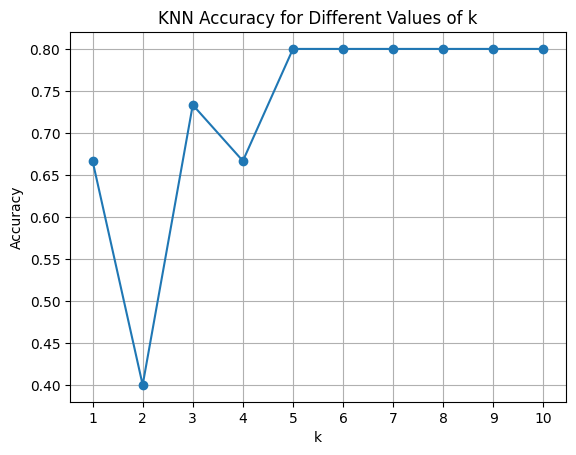

In [21]:
accuracies = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print("Accuracy for k =", i, ":", acc)

plt.plot(range(1, 11), accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

6.
Use KNN as a classifier by using KNeighborsClassifier()

In [22]:
knn = KNeighborsClassifier(n_neighbors=4)


7. Train the model using the .fit()

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

8. Test the model using the .predict()

In [24]:
knn.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

# Evaluate the model

9. Create a confusion matrix

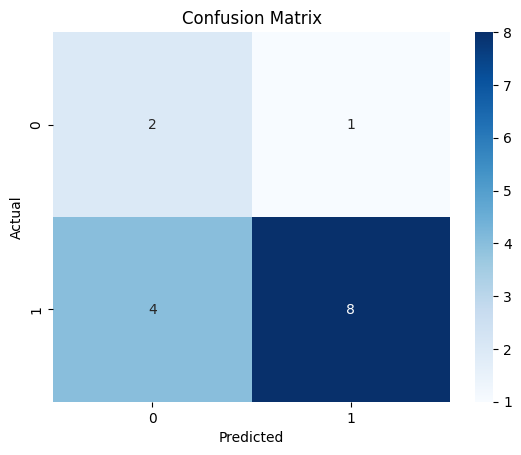

In [25]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


10. Display the accuracy

In [26]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


11. Display the precision

In [27]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")



Precision: 0.7777777777777778


12. Display the recall

In [28]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall}")


Recall: 0.6666666666666666


13. Display the f1-score

In [29]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1}")

F1 Score: 0.6984126984126985


In [30]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.89      0.67      0.76        12

    accuracy                           0.67        15
   macro avg       0.61      0.67      0.60        15
weighted avg       0.78      0.67      0.70        15



In [33]:
knn.predict([[1, 1, 0, 300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])